<a href="https://colab.research.google.com/github/vaibhavitayade/flipkart_sentiment_analysis/blob/main/MLflow%20Experiment%20Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mlflow scikit-learn matplotlib seaborn prefect

In [6]:
!pip install mlflow

In [7]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlflow.set_experiment("Sentiment_Colab_Project")

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

with mlflow.start_run(run_name="Colab_Run_1"):

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)

    mlflow.log_param("max_iter", 200)
    mlflow.log_metric("accuracy", acc)

    mlflow.sklearn.log_model(model, "model")

print("Done!")

2026/02/21 09:39:03 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/21 09:39:03 INFO mlflow.store.db.utils: Updating database tables
2026/02/21 09:39:06 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment_Colab_Project' does not exist. Creating a new experiment.
2026/02/21 09:39:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/21 09:39:06 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


Done!


2026/02/21 09:39:29 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment_Analysis_Project' does not exist. Creating a new experiment.
2026/02/21 09:39:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/21 09:39:30 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


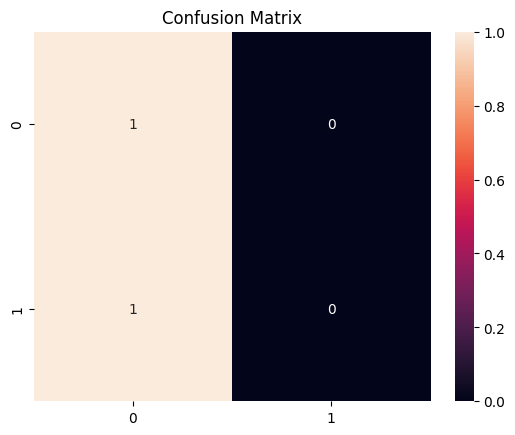

In [8]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sample data
texts = ["I love this product", "Worst experience ever",
         "Amazing quality", "Not good", "Very happy", "Terrible service"]
labels = [1, 0, 1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

mlflow.set_experiment("Sentiment_Analysis_Project")

with mlflow.start_run(run_name="Logistic_TFIDF_Run_1"):

    model = LogisticRegression(C=1.0, max_iter=200)
    model.fit(X_train_vec, y_train)

    predictions = model.predict(X_test_vec)

    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # 🔹 Log Parameters
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("C", 1.0)
    mlflow.log_param("max_iter", 200)

    # 🔹 Log Metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # 🔹 Confusion Matrix Plot
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # 🔹 Log Model
    mlflow.sklearn.log_model(model, "sentiment_model")

In [11]:
import mlflow

mlflow.set_experiment("Test_Experiment")

with mlflow.start_run(run_name="Logistic_TFIDF_Run_1"):
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_metric("accuracy", 0.95)

print("Run completed")

2026/02/21 09:41:20 INFO mlflow.tracking.fluent: Experiment with name 'Test_Experiment' does not exist. Creating a new experiment.


Run completed


In [13]:

C_value = 1.0   # define it first

run_name = f"LR_C_{C_value}"

with mlflow.start_run(run_name=run_name):
    mlflow.log_param("C", C_value)
    mlflow.log_metric("accuracy", 0.92)

In [14]:
run_name = f"LR_C_{C_value}"
mlflow.start_run(run_name=run_name)

<ActiveRun: >

In [17]:
import mlflow

mlflow.end_run()

In [18]:
import mlflow

# End any active run (safe reset)
if mlflow.active_run():
    mlflow.end_run()

mlflow.set_experiment("Epoch_Metric_Test")

with mlflow.start_run(run_name="Epoch_Run"):
    print("New run started successfully")

New run started successfully


In [19]:
with mlflow.start_run(run_name="Parent_Run"):
    with mlflow.start_run(run_name="Child_Run", nested=True):
        mlflow.log_metric("accuracy", 0.9)

In [20]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

mlflow.set_experiment("Epoch_Metric_Test")

with mlflow.start_run(run_name="Epoch_Run"):

    model = LogisticRegression(max_iter=200)

    for epoch in range(5):

        # Train model (simulating epochs)
        model.fit(X_train, y_train)

        preds = model.predict(X_test)
        acc_value = accuracy_score(y_test, preds)  # ✅ define it here

        mlflow.log_metric("accuracy", acc_value, step=epoch)

print("Done!")

Done!


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [
    "I love this product",
    "Worst experience ever",
    "Amazing quality",
    "Not good",
    "Very happy",
    "Terrible service"
]

labels = [1, 0, 1, 0, 1, 0]

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Then vectorize
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
print(X_train_vec.shape)
print(len(y_train))

(4, 8)
4


In [26]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reset any active run
mlflow.end_run()

mlflow.set_experiment("Sentiment_Hyperparameter_Test")

for C in [0.01, 0.1, 1, 10]:

    with mlflow.start_run(run_name=f"LR_C_{C}"):

        model = LogisticRegression(C=C, max_iter=200)
        model.fit(X_train_vec, y_train)

        preds = model.predict(X_test_vec)
        acc = accuracy_score(y_test, preds)

        mlflow.log_param("C", C)
        mlflow.log_metric("accuracy", acc)

print("All runs completed successfully")

2026/02/21 09:48:54 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment_Hyperparameter_Test' does not exist. Creating a new experiment.


All runs completed successfully


In [29]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression

mlflow.end_run()

mlflow.set_experiment("Final_Model_Test")

with mlflow.start_run(run_name="Register_Model_Run") as run:

    model = LogisticRegression(max_iter=200)
    model.fit(X_train_vec, y_train)

    # IMPORTANT: Log with known name
    mlflow.sklearn.log_model(model, "sentiment_model")

    run_id = run.info.run_id

# Register model
model_uri = f"runs:/{run_id}/sentiment_model"

result = mlflow.register_model(
    model_uri,
    "SentimentClassifier"
)

print("Model Registered Successfully!")

2026/02/21 09:50:49 INFO mlflow.tracking.fluent: Experiment with name 'Final_Model_Test' does not exist. Creating a new experiment.
2026/02/21 09:50:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/21 09:50:49 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
Registered model 'SentimentClassifier' already exists. Creating a new version of this model...
2026/02/21 09:50:58 WARNING mlflow.tracking._model_registry.fluent: Run with id 3eac97500ec24dbe9a5585314f95b88b has no artifacts at artifact path 'sentiment_model', registering model based on models:/m-771fb0361d2e4d60ab7ccc79ff1049a5 instead


Model Registered Successfully!


Created version '1' of model 'SentimentClassifier'.


In [31]:
import os
os.environ["PREFECT_API_URL"] = ""

In [32]:
if __name__ == "__main__":
    ml_pipeline()

INFO:prefect:Starting temporary server on http://127.0.0.1:8236
See https://docs.prefect.io/v3/concepts/server#how-to-guides for more information on running a dedicated Prefect server.
INFO:prefect.flow_runs:Beginning flow run 'optimal-oyster' for flow 'Sentiment-ML-Pipeline'
INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.flow_runs:Finished in state Completed()


In [34]:
import os
os.environ["PREFECT_API_URL"] = ""

In [35]:
if __name__ == "__main__":
    ml_pipeline()

INFO:prefect.flow_runs:Beginning flow run 'bold-squirrel' for flow 'Sentiment-ML-Pipeline'
INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.flow_runs:Finished in state Completed()
